In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
load = load_boston()
print(load.keys())
print(load.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,0

In [3]:
X, y, features = load.data, load.target, load.feature_names
print("X:")
print(X.shape)
print(X)
print("")
print("y:")
print(y.shape)
print(y)
print("")
print("features")
print(features)

X:
(506, 13)
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]

y:
(506,)
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1

In [4]:
X_DF = pd.DataFrame(X, columns = features)
X_DF

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
feature_descr = {
    "CRIM": "per capita crime rate by town",
    "ZN": "proportion of residential land zoned for lots over 25,000 sq.ft.",
    "INDUS": "proportion of non-retail business acres per town",
    "CHAS": "Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)",
    "NOX": "nitric oxides concentration (parts per 10 million)",
    "RM": "average number of rooms per dwelling",
    "AGE": "proportion of owner-occupied units built prior to 1940",
    "DIS": "weighted distances to five Boston employment centres",
    "RAD": "index of accessibility to radial highways",
    "TAX": "full-value property-tax rate per $10,000",
    "PTRATIO": "pupil-teacher ratio by town",
    "B": "1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town",
    "LSTAT": "% lower status of the population",
    "MEDV": "Median value of owner-occupied homes in $1000's"
}

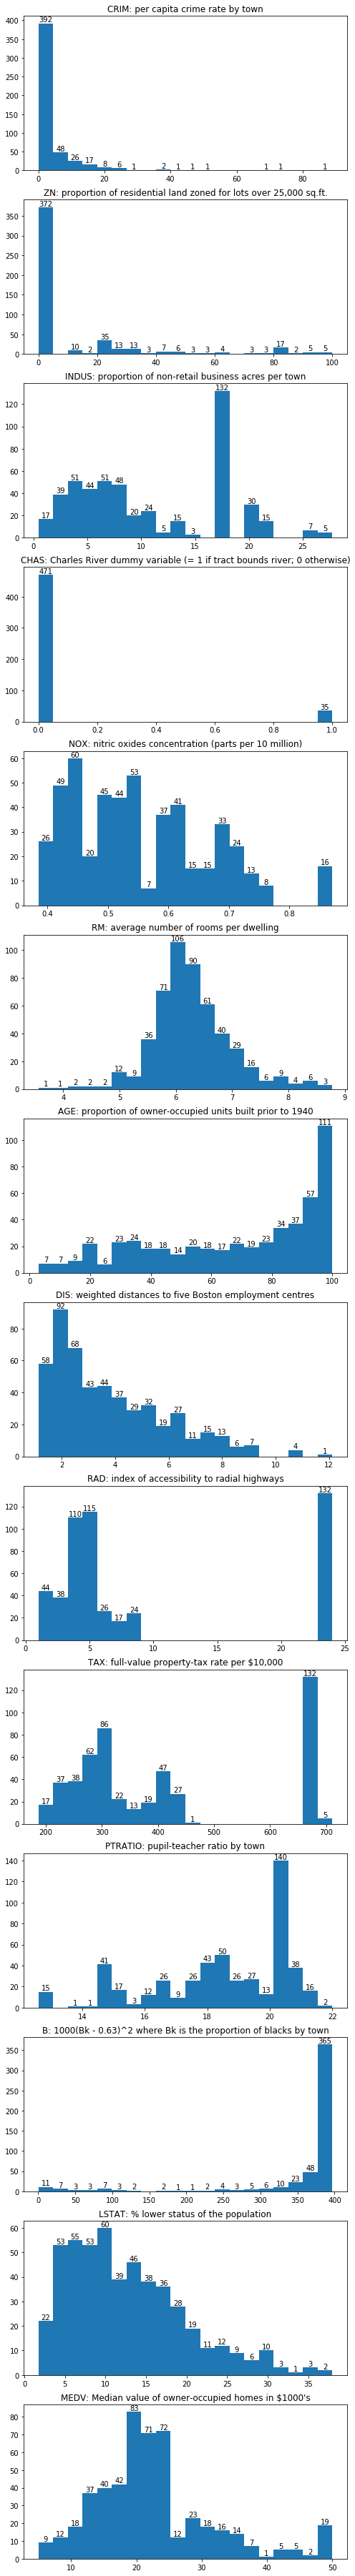

In [6]:
fig, axs = plt.subplots(14, 1, figsize=(7, 50))
fig.tight_layout(h_pad=2)
for i, col in enumerate(X_DF):
    ax = axs[i]
    counts, bins, _ = ax.hist(col, data=X_DF, bins=20)
    for i, height in enumerate(counts):
        ax.annotate(
            str(int(height)) if height!=0 else "", 
            xy=((bins[i]+bins[i+1]) / 2, height), 
            xytext=(0, 0), 
            textcoords="offset points", 
            ha="center", 
            va="bottom"
        )
    ax.title.set_text(col + ": " + feature_descr[col])
counts, bins, _ = axs[13].hist(y, bins=20)
for i, height in enumerate(counts):
    axs[13].annotate(
        str(int(height)) if height!=0 else "",
        xy=((bins[i]+bins[i+1]) / 2, height),
        xytext=(0, 0),
        textcoords="offset points",
        ha="center",
        va="bottom"
    )
axs[13].title.set_text("MEDV: Median value of owner-occupied homes in $1000's")

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
reg = LinearRegression().fit(X_train, y_train)
print('training R^2: {:.2f}'.format(reg.score(X_train, y_train)))
print('testing R^2: {:.2f}\n'.format(reg.score(X_test, y_test)))
print('training RMSE: {}'.format(mean_squared_error(y_train, reg.predict(X_train))))
print('testing RMSE: {}\n'.format(mean_squared_error(y_test, reg.predict(X_test))))
with pd.option_context('display.float_format', '{:.2f}'.format):
    print(pd.DataFrame({
        'coef': np.insert(reg.coef_, 0, reg.intercept_), 
        'descr': np.insert(X_DF.columns, 0, 'int')
    }))
type(reg.coef_)

training R^2: 0.76
testing R^2: 0.63

training RMSE: 21.9843155980954
testing RMSE: 22.263000899973566

     coef    descr
0   37.29      int
1   -0.11     CRIM
2    0.05       ZN
3    0.05    INDUS
4    2.27     CHAS
5  -19.57      NOX
6    3.85       RM
7    0.02      AGE
8   -1.39      DIS
9    0.34      RAD
10  -0.01      TAX
11  -0.99  PTRATIO
12   0.01        B
13  -0.58    LSTAT


numpy.ndarray